## The Analytics case study!

In this case study, I will be working with a sample dataset representing sales transactions from a retail company. The task is
to demonstrate the SQL querying, analytical thinking, and data visualization skills to derive insights and recommendations for improving business performance.



### Dataset Description:

The attached dataset contains information about sales transactions including order date, order number, warehouse ID, store ID, item ID, amount per unit, ordered quantity, item discount, and expected delivery date.

### Step 1

 1. Importing dataset into jupyter Notebook
 
 2. Performing **Exploratory data analysis** with pandas to understand the structure, content, and characteristics of the dataset before diving into more advanced          analyses.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from pandasql import sqldf
pysqldf = lambda q: sqldf(q,(globals))

ModuleNotFoundError: No module named 'matplotlib'

In [3]:
bazaar_Study = pd.read_excel("MY_STUDIES/Analytics Case Study - Launchpad 2024 (Dataset).xlsx")

In [4]:
bazaar_Study.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_date              25000 non-null  object 
 1   order_number            25000 non-null  int64  
 2   order_warehouse_id      24995 non-null  float64
 3   store_id                25000 non-null  object 
 4   order_status            25000 non-null  object 
 5   item_id                 25000 non-null  object 
 6   amount_per_unit         25000 non-null  float64
 7   ordered_quantity        25000 non-null  int64  
 8   item_discount           25000 non-null  float64
 9   expected_delivery_date  25000 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 1.9+ MB


In [5]:
bazaar_Study.describe()

,order_number,order_warehouse_id,amount_per_unit,ordered_quantity,item_discount
count,2.500000e+04,24995.000000,25000.000000,25000.000000,2.500000e+04
mean,2.304558e+10,6.437768,1257.726416,22.841880,-6.299190e+03
std,8.038898e+06,4.700002,3016.888458,2531.515045,1.011959e+06
min,2.303200e+10,2.000000,0.000000,1.000000,-1.600000e+08
25%,2.303875e+10,3.000000,150.000000,1.000000,0.000000e+00
50%,2.304526e+10,4.000000,306.000000,2.000000,0.000000e+00
75%,2.305248e+10,11.000000,1170.250000,4.000000,0.000000e+00
max,2.306000e+10,50.000000,110000.000000,400000.000000,9.274760e+05


In [102]:
bazaar_Study.duplicated().sum()

0

In [100]:
bazaar_Study["order_number"].duplicated().sum()

17505

order_number is duplicated multiple times in the dataset, it suggests that there are multiple entries for the same order number, which could indicate that the order information is distributed across multiple rows. Multiple items ordered in the same order, each represented as a separate row.

**Findings from EDA**

1. We have a total of 10 columns in our dataset, and the data types of **order_date** and **expected_delivery_date** are currently stored as objects.
To ensure consistency and enable datetime operations, we need to convert these columns to datetime format either using SQL or panda
   
2. The describe() method provides summary statistics for numerical columns. It's worth noting that there are null values present in the **order_warehouse_id** column. Additionally, the standard deviation for the **order_date** column is shown as NaN, indicating that the column is not in datetime format.

3. Finally the duplicated() method is used to check for duplicate values in our dataset. Fortunately, there are no duplicated values present.   
.



### Step 2 
### Data Exploration with SQL


In [7]:
sqldf('''SELECT * 
         FROM bazaar_Study
         LIMIT 5
         ''')

,order_date,order_number,order_warehouse_id,store_id,order_status,item_id,amount_per_unit,ordered_quantity,item_discount,expected_delivery_date
0,14/02/2023,23045429724,9.0,pY85faVkR6OCPZQ0CefuH,CLOSED,P437048134760065132,281.0,1,0.0,15/02/2023
1,19/02/2023,23050463841,21.0,6FTIDJ65jt1arkhJm2bbmL,CLOSED,P5801744203932,75.0,10,0.0,20/02/2023
2,20/02/2023,23051024482,4.0,7JQvKYYMMCSzfni42DKw5a,CLOSED,P810622842427393343,5420.0,1,0.0,21/02/2023
3,2023-06-02 00:00:00,23037635371,4.0,6tjBYLZoWt70PUXokHPEit,CANCELLED,P957287950450245066,2600.0,50,0.0,2023-07-02 00:00:00
4,15/02/2023,23046508076,15.0,1w0FMk0J5K43sIqSZv9b5t,CLOSED,P862686710671848219,85.0,15,0.0,16/02/2023


**1. Total Numbers of Orders**

In [8]:
sqldf('''
         SELECT COUNT(DISTINCT order_number) AS Total_Number_of_Orders
         FROM bazaar_Study
         ''')

,Total_Number_of_Orders
0,7495


**2. Total Sales Revenue**

In [9]:
sqldf('''
         SELECT SUM(((ordered_quantity * amount_per_unit) - ABS(item_discount))) AS Total_Revenue
         FROM bazaar_Study
         ''')

,Total_Revenue
0,1.154412e+08


**3. Average Order Quantity**

In [11]:
sqldf('''
         SELECT AVG(ordered_quantity) AS Average_Ordered_Quantity
         FROM bazaar_Study
         ''')

,Average_Ordered_Quantity
0,22.84188


**4(a). Distribution of orders by warehouse and store**

In [12]:
sqldf('''
         SELECT order_warehouse_id AS Warehouse,
                store_id AS Store,
                COUNT(DISTINCT order_number) AS Distribution_of_orders
         FROM bazaar_Study
         GROUP BY  order_warehouse_id,store_id
         HAVING Warehouse IS NOT NULL
         ORDER BY Distribution_of_orders DESC
         LIMIT 5
         ''')

,Warehouse,Store,Distribution_of_orders
0,2.0,3690100000000,5
1,2.0,6HEvbEzF3K1C30aODVWMDt,5
2,5.0,2lB2SBi7xRUgcwRUQUQfz6,5
3,2.0,13E6LBIMxkngJnp8pjbpXx,4
4,2.0,4Fnx5nkCgntmmf1XUcoboG,4


**4(b). Distribution of orders By Warehouse**

In [13]:
sqldf('''
         SELECT order_warehouse_id AS Warehouse,
                COUNT(DISTINCT order_number) AS Distribution_of_orders
         FROM bazaar_Study
         GROUP BY  order_warehouse_id
         HAVING Warehouse IS NOT NULL
         ORDER BY Distribution_of_orders DESC
         LIMIT 5
         ''')

,Warehouse,Distribution_of_orders
0,3.0,1651
1,2.0,1351
2,11.0,927
3,8.0,713
4,5.0,675


**4(c). Distribution of orders By Stores**

In [105]:
sqldf('''
         SELECT store_id AS Store,
                COUNT(DISTINCT order_number) AS Distribution_of_orders
         FROM bazaar_Study
         GROUP BY  store_id
         ORDER BY Distribution_of_orders DESC
         LIMIT 5
         ''')

,Store,Distribution_of_orders
0,6HEvbEzF3K1C30aODVWMDt,5
1,3690100000000,5
2,2lB2SBi7xRUgcwRUQUQfz6,5
3,NMNbguQTkB38lWVP5UKTY,4
4,7136rrDwj9ULZd4MfYm7e5,4


**5. Top Selling Items**

In [57]:
sqldf('''
         SELECT item_id AS Top_Selling_items, 
                SUM(ordered_quantity) AS Total_quanity_sold
         FROM bazaar_Study
         GROUP BY  item_id
         ORDER BY Total_quanity_sold DESC
         LIMIT 5
         ''')

,Top_Selling_items,Total_quanity_sold
0,P2RwFPjdKJ0oFr9OoVmrDRm,400000
1,P5914112688284,20926
2,P227644615428796458,12108
3,P5678188101788,7379
4,P193053596797216954,5715


### Step 3

### Answering Analytical Questions Using SQL

**1. Overall discount rate**

In most cases, discounts are conventionally represented as negative values. This convention makes sense because discounts are typically amounts subtracted from the original price. Therefore, it's generally better to represent discounts as negative values.

In [16]:
sqldf('''
         SELECT item_discount
         FROM bazaar_Study
         WHERE item_discount < 0
         ''')

,item_discount
0,-2.500000e+05
1,-8.065200e+02
2,-1.000000e+00
3,-1.600000e+08
4,-2.990000e+00
5,-1.350000e+02


In [17]:
sqldf('''
         SELECT item_discount
         FROM bazaar_Study
         WHERE item_discount > 0
         ''')

,item_discount
0,36.0
1,36.0
2,600.0
3,3500.0
4,7.0
...,...
5725,5.0
5726,6.0
5727,240.0
5728,3.0


In our dataset, I observed an inconsistency in the representation of discounts, where some discounts are recorded as positive values while others are negative. To address this inconsistency, I made the decision to convert all discounts to negative values before calculating the average discount rate. This decision was based on the conventional practice in finance and accounting, where discounts are typically represented as negative values.

By adhering to this convention, I ensure consistency and clarity in the representation of discounts, facilitating accurate analysis and interpretation of the data. Converting discounts to negative values aligns with the intuitive understanding of discounts as deductions or reductions from the original price, simplifying computations and enhancing the interpretability of the dataset. Therefore, the calculated average discount rate reflects the standardized representation of discounts as negative values, enabling meaningful analysis of pricing strategies and sales performance.

In [18]:
sqldf('''
         SELECT AVG(
                    CASE WHEN item_discount > 0 THEN item_discount * -1
                    ELSE item_discount
                    END) AS overall_discount_rate
         FROM bazaar_Study
         ''')

,overall_discount_rate
0,-6520.88516


**1(b). The average discount per item sold for each distinct item_id**

In [107]:
sqldf('''
         SELECT item_id,
                AVG(CASE WHEN item_discount > 0 THEN item_discount * -1
                ELSE item_discount
                END
                ) AS AVG_Discount_Per_Item_Sold_For_Each_Item
         FROM bazaar_Study
         GROUP BY item_id
         ORDER BY  AVG_Discount_Per_Item_Sold_For_Each_Item 
         LIMIT 5
         ''')

,item_id,AVG_Discount_Per_Item_Sold_For_Each_Item
0,P2RwFPjdKJ0oFr9OoVmrDRm,-1.600000e+08
1,P431219087541607447,-3.650260e+05
2,P7EuMEqNrLfjaPC1nvEUqsB,-2.500000e+05
3,P358836009799511708,-5.764835e+04
4,P5532071329948,-1.612000e+04


**2. Which warehouse has the highest average order value**

In [61]:
sqldf('''
        SELECT order_warehouse_id,
                SUM(ordered_quantity * amount_per_unit - ABS(item_discount)) / 
                COUNT(DISTINCT order_number) AS  highest_average_order_value
         FROM bazaar_Study
         WHERE order_warehouse_id IS NOT NULL
         GROUP BY order_warehouse_id
         ORDER BY  highest_average_order_value DESC
         LIMIT 5
         ''')

,order_warehouse_id,highest_average_order_value
0,14.0,136468.000000
1,39.0,58587.500000
2,7.0,27284.282051
3,5.0,23550.882627
4,4.0,20806.759340


**3. Total Revenue Generated by Each Store**

In [21]:
sqldf('''
         SELECT store_id,
                SUM(ordered_quantity * amount_per_unit - ABS(item_discount)) AS Total_Revenue
         FROM bazaar_Study
         WHERE store_id IS NOT NULL
         GROUP BY store_id
         ORDER BY Total_Revenue DESC
         LIMIT 5
''')

,store_id,Total_Revenue
0,7ldsLx849ptRljYZTK8tl8,3360070.0
1,2Z9CsLeVlPvooYgQOUjcRI,2616020.0
2,4PdVF4u8WXhO4xnSMCYIzs,2560000.0
3,49WcD3UqaC72tOQ6tood3n,2030000.0
4,3ydAgE2Bkjbp6CvTfZjg7P,1880500.0


**4.  Identify the top 5 customers**

In [67]:
sqldf('''

        SELECT store_id, 
               order_number AS Top_Customers_Order_Id,
                SUM(ordered_quantity * amount_per_unit - ABS(item_discount)) AS Total_Amount_Spent
         FROM bazaar_Study
         WHERE store_id IS NOT NULL
         GROUP BY store_id
         ORDER BY Total_Amount_Spent DESC
         LIMIT 5
         

''')

,store_id,Top_Customers_Order_Id,Total_Amount_Spent
0,7ldsLx849ptRljYZTK8tl8,23039497453,3360070.0
1,2Z9CsLeVlPvooYgQOUjcRI,23055942343,2616020.0
2,4PdVF4u8WXhO4xnSMCYIzs,23038626816,2560000.0
3,49WcD3UqaC72tOQ6tood3n,23046539355,2030000.0
4,3ydAgE2Bkjbp6CvTfZjg7P,23051225637,1880500.0


**5.  Month-over-month growth rate of sales revenue**

In [103]:
sqldf('''
         SELECT
               strftime('%Y-%m', order_date) AS month,
               SUM(ordered_quantity * amount_per_unit - ABS(item_discount)) AS sales_revenue,
               (SUM(ordered_quantity * amount_per_unit - ABS(item_discount)) - LAG(SUM(ordered_quantity * amount_per_unit - ABS(item_discount)), 1) OVER (ORDER BY strftime('%Y-%m', order_date))) / LAG(SUM(ordered_quantity * amount_per_unit - ABS(item_discount)), 1) OVER (ORDER BY strftime('%Y-%m', order_date)) AS revenue_growth_rate
         FROM
               bazaar_Study
         GROUP BY
              strftime('%Y-%m', order_date)
         ORDER BY revenue_growth_rate DESC     

''')

,month,sales_revenue,revenue_growth_rate
0,2023-02,7.171018e+07,17.118508
1,2023-06,3.694340e+06,2.848190
2,2023-07,8.269361e+06,1.238387
3,2023-11,3.626123e+06,0.346765
4,2023-10,2.692469e+06,-0.094043
5,2023-08,7.463214e+06,-0.097486
6,2023-04,3.905202e+06,-0.131091
7,2023-12,1.696119e+06,-0.532250
8,2023-09,2.971962e+06,-0.601785
9,2023-05,9.600202e+05,-0.754169


**6. percentage of orders that were cancelled**

In [24]:
sqldf('''
               SELECT
               CAST (COUNT(CASE WHEN order_status == 'CANCELLED' THEN 1 END) AS FLOAT)/
               CAST(COUNT(*) AS FLOAT) * 100 AS Percentage_of_orders_cancelled
               FROM bazaar_Study;              
''')

,Percentage_of_orders_cancelled
0,5.516


### Step 4
### Data Visualization

**Time series plot of sales revenue over time.**

In [108]:
Sales_Revenue_over_time = sqldf(''' 

         SELECT strftime('%Y-%m', order_date) AS month,
                SUM(ordered_quantity * amount_per_unit - ABS(item_discount)) AS Revenue
         FROM bazaar_Study
         GROUP BY month
''')

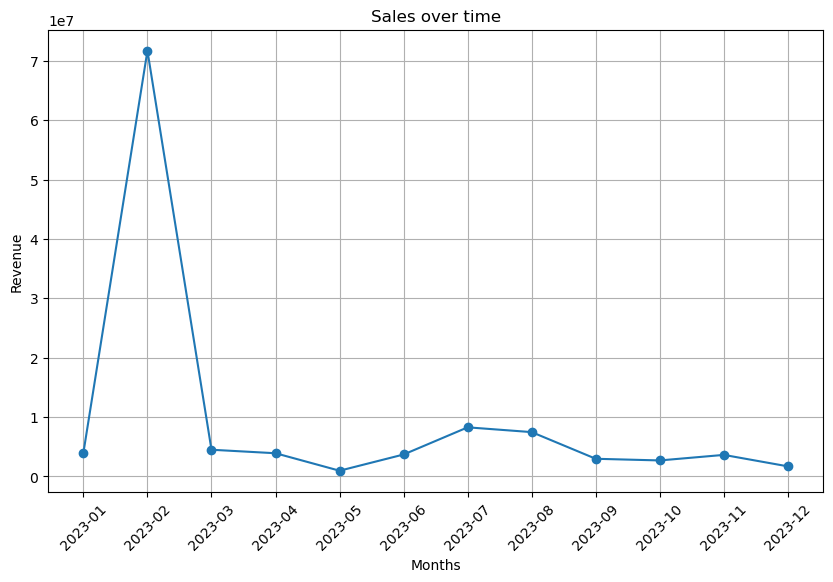

In [109]:
plt.figure(figsize=(10,6))
plt.plot(Sales_Revenue_over_time.month,Sales_Revenue_over_time.Revenue,marker = "o")
plt.xticks(rotation = 45)
plt.grid()
plt.title("Sales over time")
plt.xlabel("Months")
plt.ylabel("Revenue")
plt.show()

The significant spike in revenue observed in February followed by a decline in subsequent months could be attributed to various factors:

**Seasonal Trends:** 
February may coincide with peak shopping periods such as holiday seasons, festivals, or promotional events, leading to a surge in consumer spending. After this peak period, sales may normalize as the demand returns to typical levels in the following months.

**One-time Events or Campaigns:** The February spike could be driven by one-time events, special promotions, or marketing campaigns launched during that period. These initiatives might have generated excitement and attracted a higher volume of customers, resulting in increased sales revenue for that month. Once the campaign concluded, sales may have reverted to their usual levels.

**External Factors:** Economic conditions, market trends, or changes in consumer behavior could also influence revenue fluctuations. Factors such as changes in disposable income, consumer confidence, or competitive landscape might have impacted purchasing decisions and contributed to the revenue patterns observed.

To better understand the reasons behind the revenue fluctuations and address any underlying issues, the company should conduct a detailed analysis of sales data, customer feedback, and market dynamics during the period in question. This analysis can help identify the specific drivers behind the February spike and inform strategic decisions to sustain or replicate that success in the future. Additionally, implementing proactive sales and marketing strategies, optimizing inventory management, and leveraging customer insights can help smooth revenue patterns and drive consistent growth over time.








**Bar chart showing total revenue by store.**

In [25]:
Revenue_by_store = sqldf('''SELECT store_id AS stores,
                                   SUM(((ordered_quantity * amount_per_unit) - ABS(item_discount))) AS Total_Revenue
                            FROM bazaar_Study
                            GROUP BY store_id
                            ORDER BY Total_Revenue DESC
                            LIMIT 10''')

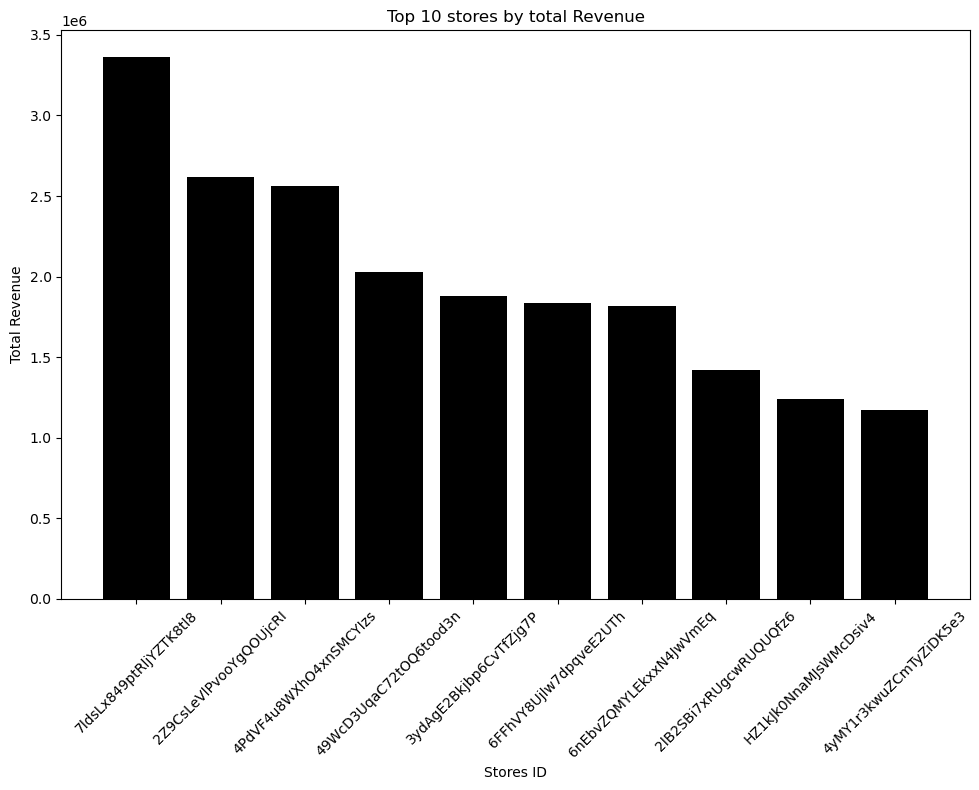

In [26]:
plt.figure(figsize=(10, 8))
plt.bar(Revenue_by_store.stores,Revenue_by_store.Total_Revenue,color = "black")
plt.xlabel("Stores ID")
plt.ylabel("Total Revenue")
plt.title("Top 10 stores by total Revenue")
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [27]:
Revenue_by_store_2 = sqldf('''SELECT store_id AS stores,
                                   SUM(((ordered_quantity * amount_per_unit) - ABS(item_discount))) AS Total_Revenue
                            FROM bazaar_Study
                            GROUP BY store_id
                            ORDER BY Total_Revenue 
                            LIMIT 10''')

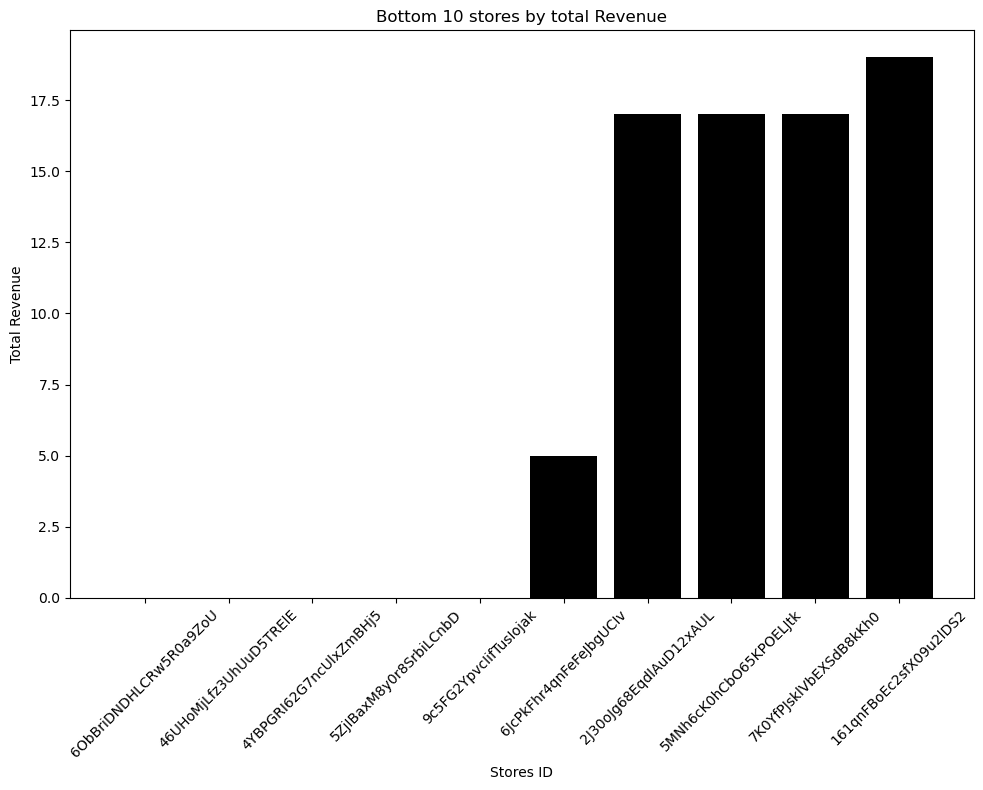

In [78]:
plt.figure(figsize=(10, 8))
plt.bar(Revenue_by_store_2.stores,Revenue_by_store_2.Total_Revenue,color= "Black")
plt.xlabel("Stores ID")
plt.ylabel("Total Revenue")
plt.title("Bottom 10 stores by total Revenue")
plt.xticks(rotation=45) 
plt.tight_layout()

plt.show()

**Minimal Revenue Stores:** Several stores in the dataset exhibit minimal revenue, with total revenue values close to zero. These stores may either be newly established or experiencing challenges in generating significant sales. It is essential to investigate the factors contributing to their low revenue and devise strategies to enhance their performance.

**Pie chart illustrating the distribution of orders by warehouse.**

In [29]:
Distribution_by_Warehouse = sqldf('''SELECT order_warehouse_id AS Warehouse,
                                            COUNT(DISTINCT order_number) AS Distribution_of_orders
                                     FROM bazaar_Study
                                     GROUP BY order_warehouse_id
                                     HAVING Warehouse IS NOT NULL
                                     ORDER BY Distribution_of_orders DESC
                                     LIMIT 10''')

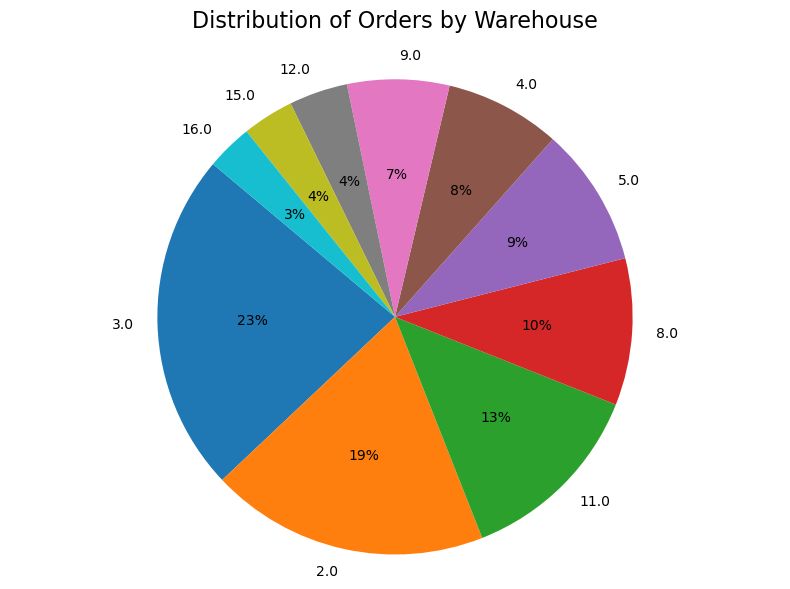

In [30]:
plt.figure(figsize=(8, 6))
plt.pie(Distribution_by_Warehouse.Distribution_of_orders, labels=Distribution_by_Warehouse.Warehouse, autopct='%1.f%%', startangle=140)
plt.title('Distribution of Orders by Warehouse', fontsize=16, pad=20)
plt.axis('equal')  
plt.tight_layout() 

plt.show()

### Insights and recommendations

**1.Warehouse and Store Performance:**
Warehouse **3** has the highest distribution of orders, followed by Warehouse **2**. This indicates that these warehouses are handling a substantial volume of orders, possibly due to their strategic locations or efficient operations.

**2.Top Selling Items:** 
The top-selling item with the ID "**P2RwFPjdKJ0oFr9OoVmrDRm**" stands out with a significantly higher quantity sold compared to other items. This suggests a strong demand for this particular product, which could be due to its popularity, competitive pricing. The company should ensure adequate stock availability for this item and consider promoting it further to capitalize on its popularity.

**3.Overall Discount Rate:** 
The overall discount rate is approximately **6520.88**, calculated by averaging all discount values. The company should analyze the impact of discounts on revenue and profitability to optimize pricing strategies effectively.

**4.Total Revenue by Store:** 
The top-performing stores, such as "**7ldsLx849ptRljYZTK8tl8**" and "**2Z9CsLeVlPvooYgQOUjcRI**," generate substantial revenue, reflecting their strong sales performance. These stores could serve as benchmarks for performance evaluation and provide insights into successful sales strategies, customer engagement, and product offerings.

**5.Month-over-Month Revenue Growth:** 
Monthly revenue fluctuates over time, with notable peaks and dips in certain months. For example, revenue spikes in February, June and July are followed by a decline in August. Understanding these revenue trends can help the company identify seasonal patterns, respond to market dynamics, and adjust inventory levels and marketing strategies accordingly.

**6.Percentage of Orders Cancelled:** 
Approximately 5.52% of orders were cancelled, indicating potential challenges in order fulfillment or customer satisfaction. The company should investigate the reasons for cancellations, such as inventory shortages, shipping delays, or product unavailability, and implement measures to reduce cancellation rates and improve customer experience.

### Actionable Recommendations:

 

**1.Optimize Inventory Management:** 
Allocate inventory based on sales performance and demand to ensure optimal stock levels across warehouses and stores. Focus on replenishing top-selling items and reducing excess inventory for slow-moving products to minimize carrying costs and improve cash flow.


**2.Tailor Pricing Strategies:** 
Analyze the impact of discounts on sales revenue and profitability to refine pricing strategies effectively. Consider implementing dynamic pricing algorithms based on demand elasticity, competitor pricing, and customer segmentation to maximize revenue and maintain competitiveness.


**3.Enhance Store Performance:** 
Support high-performing stores with targeted marketing campaigns, personalized promotions, and staff training to sustain and enhance their sales performance. Leverage insights from top revenue-generating stores to identify best practices and replicate successful strategies across other locations.

**4.Improve Order Fulfillment:** Streamline order processing and fulfillment workflows to minimize order cancellations and enhance customer satisfaction. Invest in inventory visibility, logistics optimization, and communication channels to provide real-time updates to customers and address any issues proactively.

**5.Monitor Sales Trends:** Continuously monitor sales trends, revenue growth rates, and key performance indicators to identify emerging opportunities and challenges. Utilize data analytics tools to forecast demand, optimize inventory allocation, and capitalize on market trends to drive sustained growth and profitability.

By implementing these tailored recommendations and leveraging insights from analysis, the company can optimize sales performance, improve operational efficiency, and enhance customer satisfaction, ultimately driving long-term success and competitiveness in the market.